In [1]:
import numpy as np
import cv2
import skimage
from skimage import io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
from scipy import stats
from statistics import mean 

# Shape processor part

In [42]:
img = cv2.imread("../example_images/sem_1.jpg", cv2.IMREAD_GRAYSCALE)

In [43]:
image = img
image = gaussian_filter(image, 1)
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image
dilated = reconstruction(seed, mask, method='dilation')

In [44]:
def boundary_detection(img, thres = 20):
    '''
    thres: threshold to distinguish the scale bar background with particle background by grey scale
    for now only work for SEM img, needs update if apply to different imgs
    scan from upper to bottom, also needs update if need scan from left to right
    '''
    mode_list = []
    for line in range(len(img)):
        mode = stats.mode(img[line])
        mode_list.append(int(mode[0]))
        
        if line >= 1:
            mode_mean = mean(mode_list)
            if mode_mean - int(mode[0]) >= thres:
                boundary = line
                break
        
    return boundary

In [45]:
bound = boundary_detection(dilated)
img_c = img[:bound,:]
#img_c = cv2.GaussianBlur(img_c,(5,5),0)

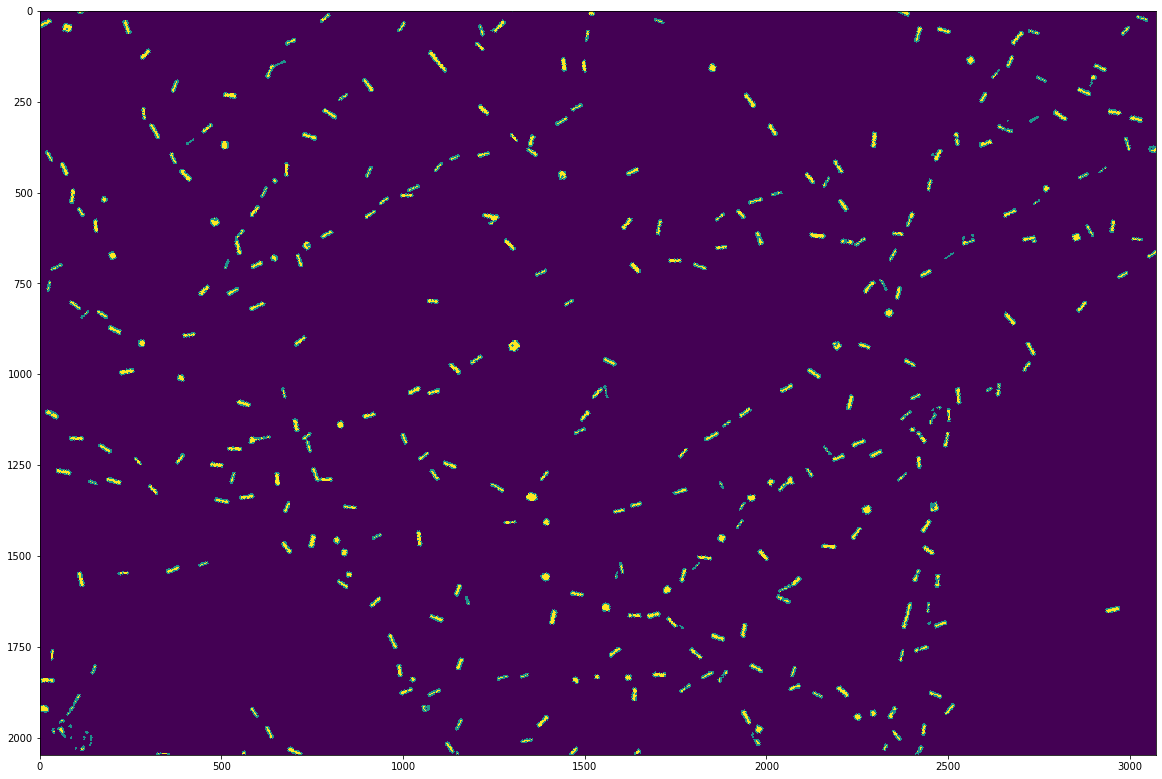

In [14]:
_, threshold = cv2.threshold(img_c, 220, 255, cv2.THRESH_BINARY)
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.drawContours(threshold, contour, -1, (130, 0, 0), 3)
plt.figure(figsize=(20,16))
plt.imshow(threshold)

#For the particles, a filter is needed to filter out small areas to avoid additional noises

In [22]:
font = cv2.FONT_HERSHEY_COMPLEX
edge = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.1, True)#Approx estimation parameter needs be tuned
    hull = cv2.convexHull(approx)
    edge.append(len(hull))
#plt.hist(edge)
    #cv2.drawContours(threshold, [approx], 0, (0), 5)
    #x = approx.ravel()[0]
    #y = approx.ravel()[1]
    #cv2.putText(threshold, str(len(approx)), (x, y), font, 1, (180))
    #edge.append(len(approx))
    #cv2.drawContours(threshold, contour, -1, (130, 0, 0), 3)

384


(array([  2.,   4.,  14.,  23.,  12.,  79., 130.,  94.,  23.,   3.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <a list of 10 Patch objects>)

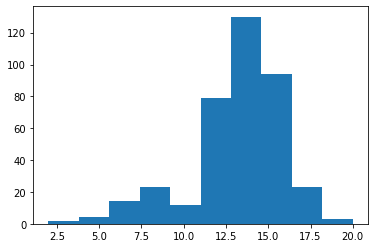

In [23]:
print(len(edge))
plt.hist(edge)

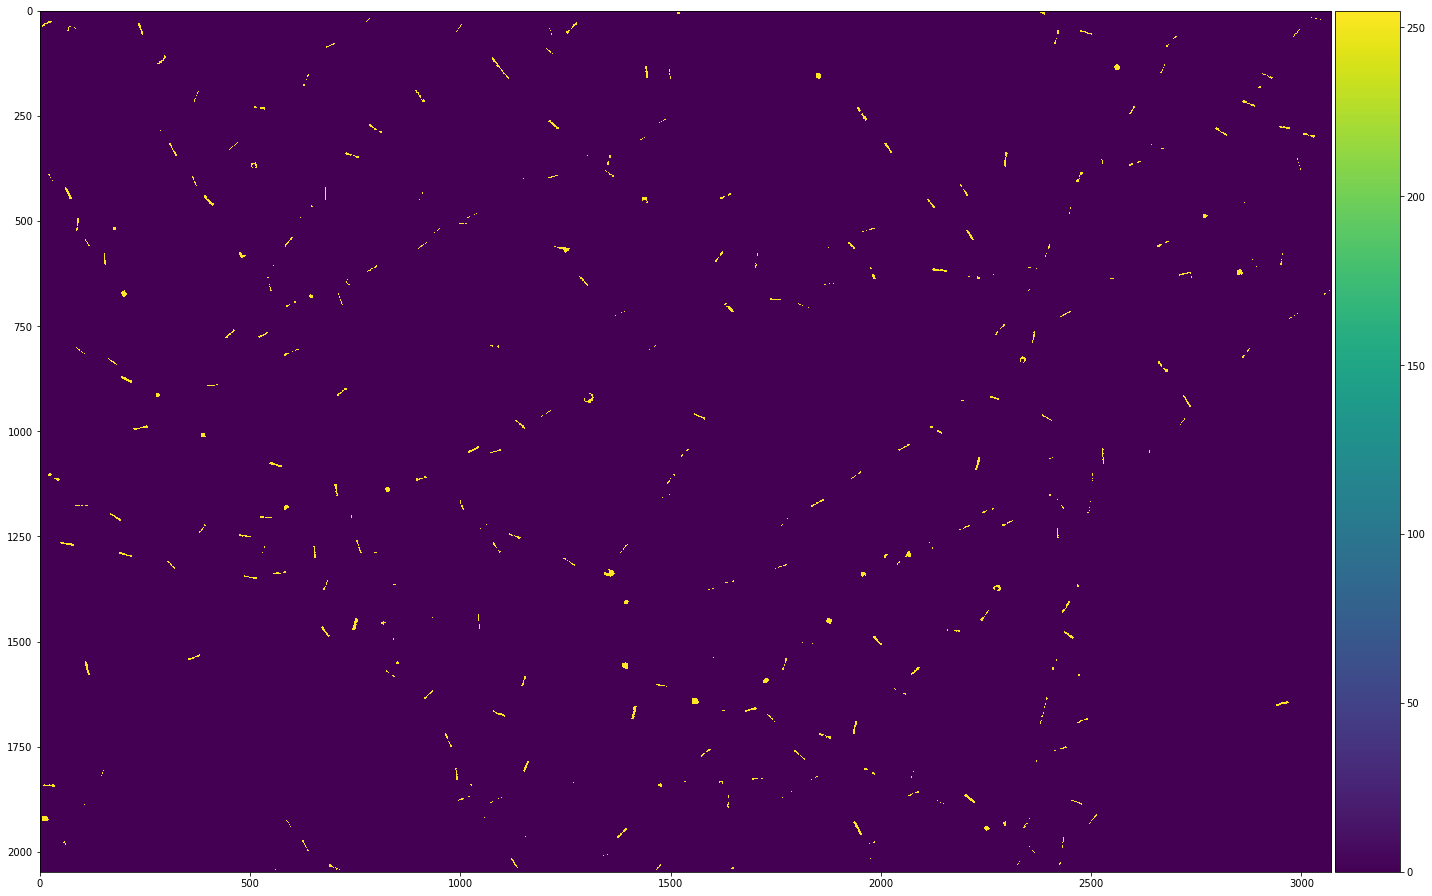

In [112]:
plt.figure(figsize=(20,16))
io.imshow(threshold)

Play with cv2 trails

In [24]:
img = cv2.imread("../example_images/sem_1.jpg", cv2.IMREAD_GRAYSCALE)

In [36]:
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                    [0.04, 0.04, 0.04, 0.04, 0.04],
                    [0.04, 0.04, 0.04, 0.04, 0.04],
                    [0.04, 0.04, 0.04, 0.04, 0.04],
                    [0.04, 0.04, 0.04, 0.04, 0.04]])

In [71]:
kernel = np.ones((8,8))
kernel = kernel / 64

In [72]:
img_f = cv2.filter2D(img_c, -1, kernel)

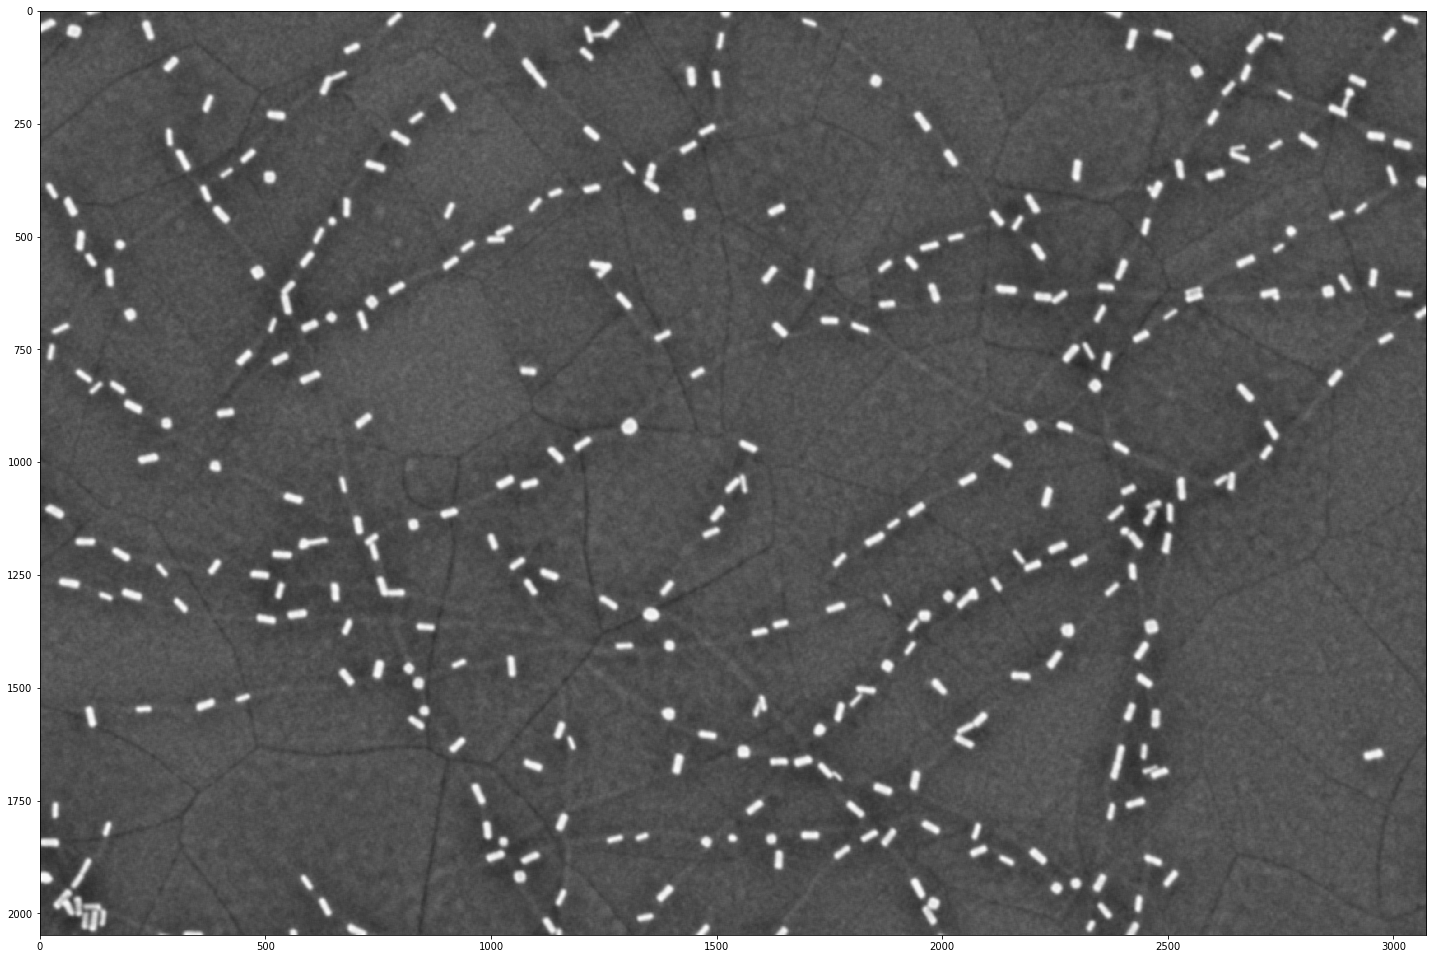

In [73]:
plt.figure(figsize=(20,16))
io.imshow(img_f)

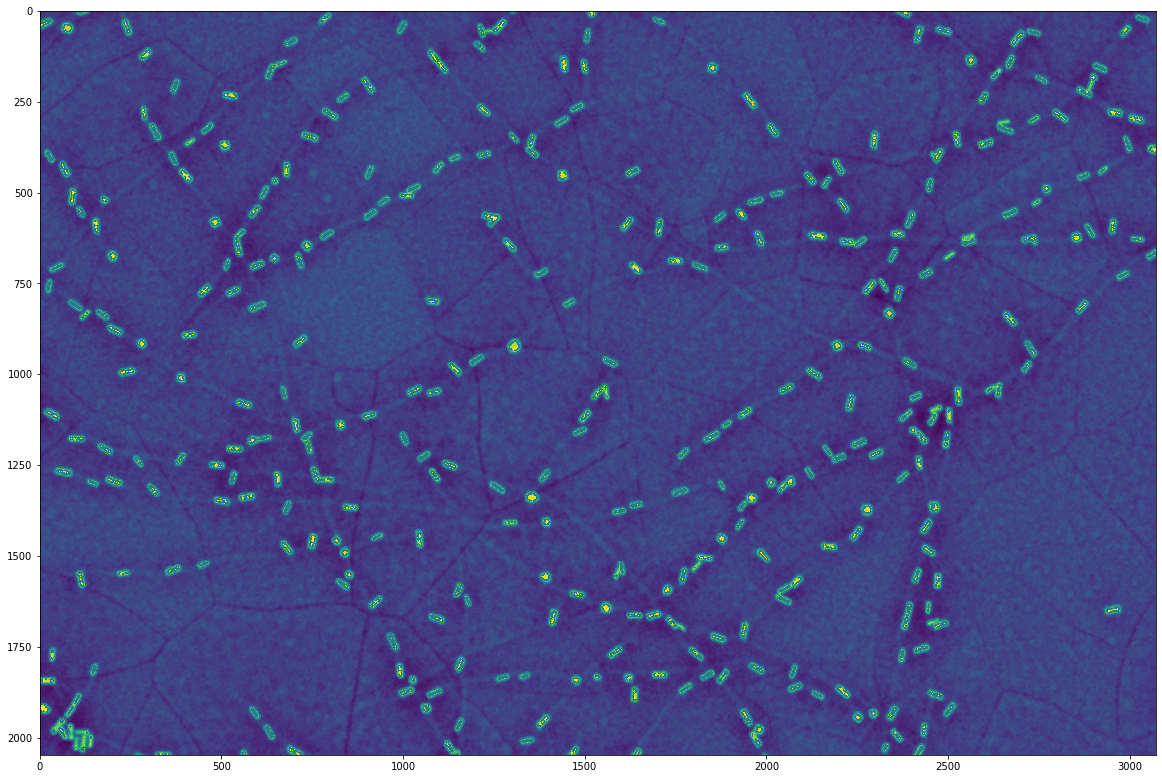

In [80]:
_, threshold = cv2.threshold(img_f, 220, 255, cv2.THRESH_BINARY)
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.drawContours(img_f, contour, -1, (130, 0, 0), 1)
plt.figure(figsize=(20,16))
plt.imshow(img_f)

In [75]:
font = cv2.FONT_HERSHEY_COMPLEX
edge = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.1, True)#Approx estimation parameter needs be tuned
    hull = cv2.convexHull(approx)
    edge.append(len(hull))
#plt.hist(edge)
    #cv2.drawContours(threshold, [approx], 0, (0), 5)
    #x = approx.ravel()[0]
    #y = approx.ravel()[1]
    #cv2.putText(threshold, str(len(approx)), (x, y), font, 1, (180))
    #edge.append(len(approx))
    #cv2.drawContours(threshold, contour, -1, (130, 0, 0), 3)

374


(array([  7.,   9.,  10.,  16.,  44., 100., 115.,  55.,  14.,   4.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

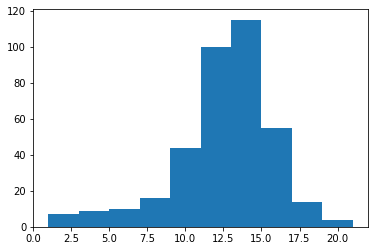

In [81]:
print(len(edge))
plt.hist(edge)